https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data
https://www.kaggle.com/datasets/gauravtopre/credit-card-defaulter-prediction
https://archive.ics.uci.edu/dataset/573/south+german+credit+update
https://www.kaggle.com/datasets/sid321axn/south-german-credit-updated/data

## Download the Data

In [1]:
import pandas as pd

df = pd.read_csv("data/german_credit.csv")

In [2]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Categorias para '{column}':\n")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")  

Categorias para 'status':

status
... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: count, dtype: int64

--------------------------------------------------

Categorias para 'credit_history':

credit_history
no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: count, dtype: int64

--------------------------------------------------

Categorias para 'purpose':

purpose
furniture/equipment    280
others                 234
car (used)             181
car (new)              103
retraining              97
repairs                 50
domestic appliances     22
business                12
radio/television        12
vacation                

Tipo de Variable -Método de Tratamiento (a prior)
- Variables Ordinales Discretizadas Cuantitativas: Considerarlas como categóricas y aplicar OneHotEncoder o OrdinalEncoder si siguen un orden claro
- Variables Categoricas: OneHotEncoder
- Variables Numericas: StandardScaler

In [5]:
df.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


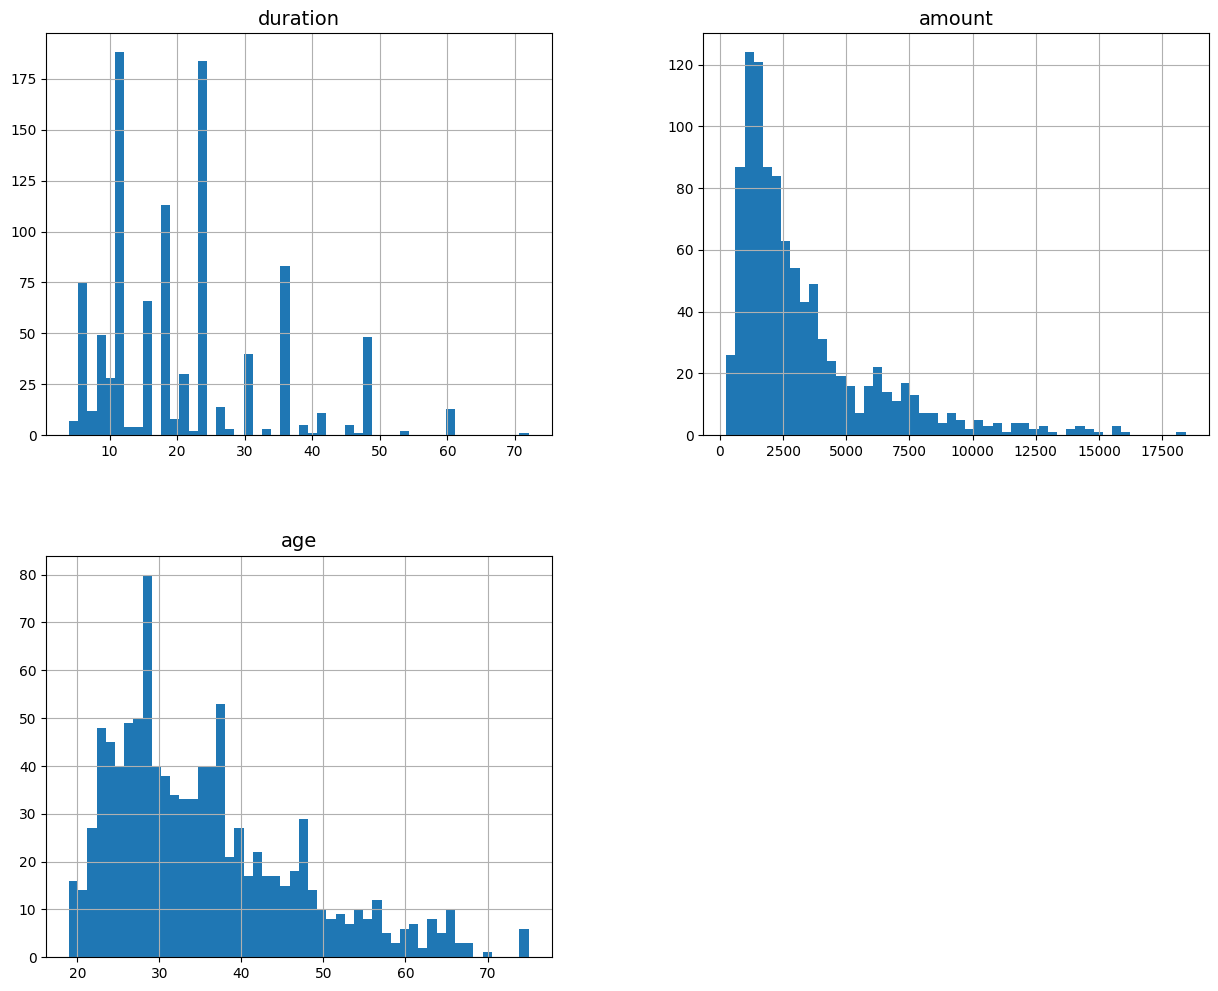

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(15,12))
plt.show()

## Create a Test Set 

Stratified Sampling

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    df, test_size=0.2, stratify=df["credit_risk"], random_state=42)

SMOTE (Synthetic Minority Over-sampling Technique)

In [8]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train = train_set.drop('credit_risk', axis=1)
y_train = train_set['credit_risk']  

X_train_50, y_train_50 = ros.fit_resample(X_train, y_train)

In [9]:
def credit_risk_proportions(data):
    return data["credit_risk"].value_counts() / len(data)

smote = (y_train_50.value_counts() / len(y_train_50)).astype(float)

compare_props = pd.DataFrame({
    "Overall %": credit_risk_proportions(df),
    "Stratified %": credit_risk_proportions(test_set),
    "SMOTE %": smote,
}).sort_index()
compare_props.index.name = "Credit Risk"
(compare_props * 100).round(2)

,Overall %,Stratified %,SMOTE %
Credit Risk,,,
bad,30.0,30.0,50.0
good,70.0,70.0,50.0


We'll start using the stratified sample and comeback to the SMOTE sample in the event we need more "bad" category data to train our classifier.

## Discover and Visualize the Data to Gain Insights

In [10]:
credit = train_set.copy()

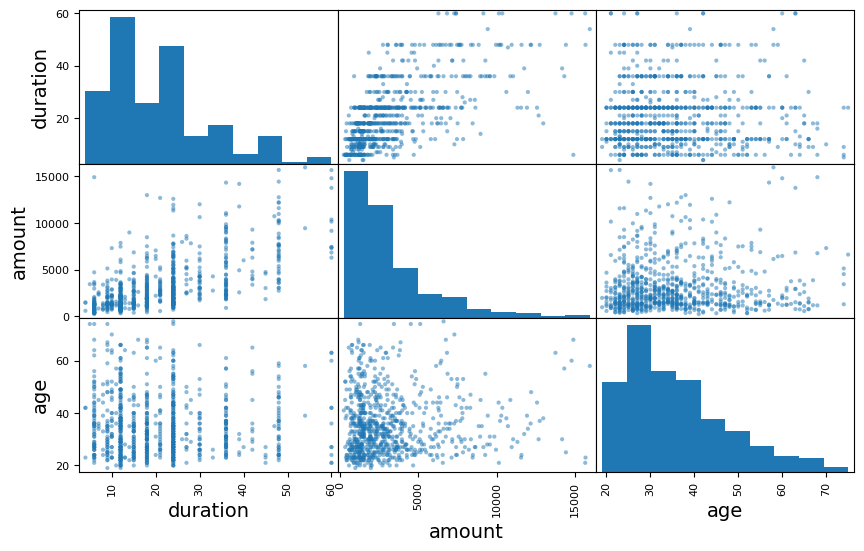

In [11]:
from pandas.plotting import scatter_matrix

numerical_columns = credit.select_dtypes(include=['int64']).columns
scatter_matrix(credit[numerical_columns], figsize=(10, 6))

plt.show()

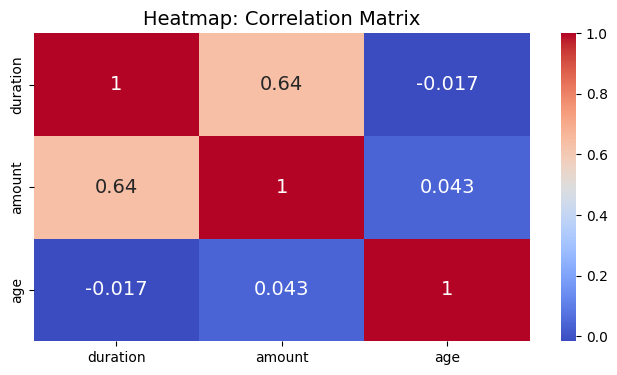

In [12]:
import seaborn as sns

correlation_matrix = credit[numerical_columns].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()

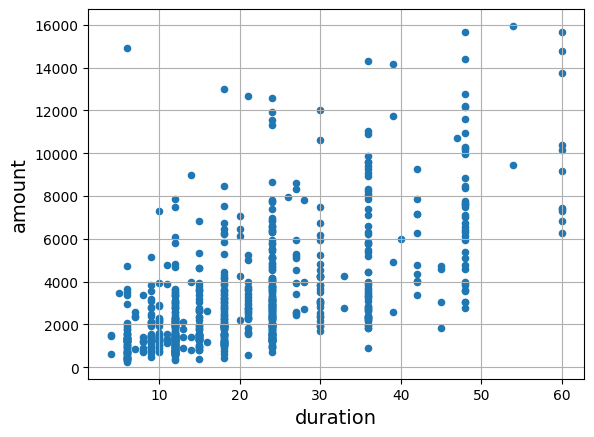

In [13]:
credit.plot(kind="scatter", x="duration", y="amount",
            grid=True)
plt.show()

## Prepare the Data for Machine Learning Algorithms

In [14]:
credit = train_set.drop("credit_risk", axis=1)
credit_label = train_set["credit_risk"].copy()

### Data Cleaning

In [15]:
import numpy as np

credit_num = credit.select_dtypes(include=[np.number])

In [16]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(credit_num)

In [17]:
np.sum(outlier_pred == -1)

186

In [18]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
credit_num_std_scaled = std_scaler.fit_transform(credit_num)

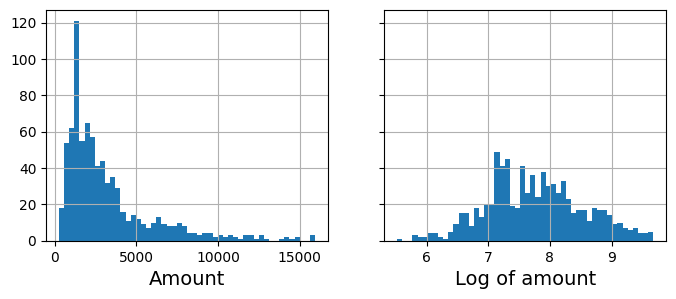

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
credit["amount"].hist(ax=axs[0], bins=50)
credit["amount"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Amount")
axs[1].set_xlabel("Log of amount")

plt.show()

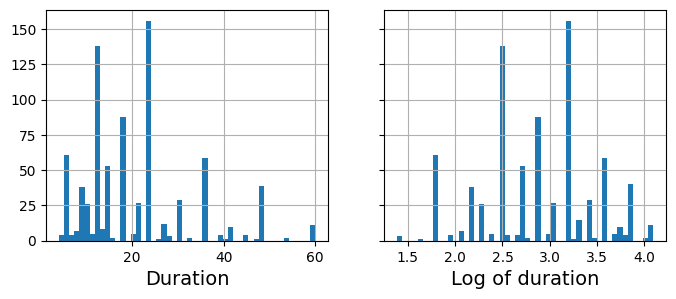

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
credit["duration"].hist(ax=axs[0], bins=50)
credit["duration"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Duration")
axs[1].set_xlabel("Log of duration")

plt.show()

In [21]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(credit[["duration"]])

In [22]:
log_pop[:2]

,duration
485,2.484907
510,1.791759


#### Handling Text and Categorical Attributes

In [23]:
credit['job'].value_counts()

job
skilled employee/official                     503
unskilled - resident                          160
manager/self-empl./highly qualif. employee    117
unemployed/unskilled - non-resident            20
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
credit_cat_1hot = cat_encoder.fit_transform(credit[['job']])

In [25]:
cat_encoder.categories_

[array(['manager/self-empl./highly qualif. employee',
        'skilled employee/official', 'unemployed/unskilled - non-resident',
        'unskilled - resident'], dtype=object)]

In [26]:
cat_encoder.feature_names_in_

array(['job'], dtype=object)

In [27]:
df_test_unknown = pd.DataFrame({"job": ["skilled employee/official", "unskilled - resident"]})

In [28]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [29]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [30]:
df_output

,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0


In [31]:
credit['employment_duration'].value_counts()

employment_duration
1 <= ... < 4 yrs    269
>= 7 yrs            202
4 <= ... < 7 yrs    141
< 1 yr              135
unemployed           53
Name: count, dtype: int64

In [32]:
from sklearn.preprocessing import OrdinalEncoder

ordered_categories = [['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs']]

ordinal_encoder = OrdinalEncoder(categories=ordered_categories)
credit_cat_encoded = ordinal_encoder.fit_transform(credit[['employment_duration']])

In [33]:
credit_cat_encoded[:5]

array([[2.],
       [2.],
       [1.],
       [2.],
       [2.]])

In [34]:
ordinal_encoder.categories_

[array(['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs',
        '>= 7 yrs'], dtype=object)]

#### Transformation Pipeline

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

cat_attribs = ['status', 'credit_history', 'purpose', 'savings', 'property', 'job',
                'other_debtors', 'other_installment_plans', 'housing', 'people_liable', 'telephone', 'foreign_worker']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))


In [36]:
ordinal_columns = ['employment_duration', 'installment_rate', 'present_residence', 'number_credits']

categories_dict = {
    'employment_duration': ['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],
    'installment_rate': ['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'],
    'present_residence': ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],
    'number_credits': ['1', '3-Feb', '5-Apr', '>= 6']
}

In [37]:
ord_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=[categories_dict[col] for col in ordinal_columns]))

In [49]:
from sklearn.compose import ColumnTransformer

def column_ratio(X):
    X = np.array(X)
    ratio = X[:, 0] / X[:, 1]
    return ratio.reshape(-1, 1)

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

preprocessing = ColumnTransformer([
        ("annual_amount", ratio_pipeline(), ["amount", "duration"]),
        ("log", log_pipeline, ["amount", "duration", "age"]),
        ("cat", cat_pipeline, cat_attribs),
        ("ord", ord_pipeline, ordinal_columns),
        ("drop_personal_status_sex", "drop", ["personal_status_sex"]) ,
    ],
    remainder='passthrough')

In [50]:
credit_prepared = preprocessing.fit_transform(credit)
credit_prepared.shape

(800, 55)

In [51]:
credit.shape

(800, 20)

In [52]:
preprocessing.get_feature_names_out()

array(['annual_amount__ratio', 'log__amount', 'log__duration', 'log__age',
       'cat__status_... < 0 DM',
       'cat__status_... >= 200 DM / salary for at least 1 year',
       'cat__status_0<= ... < 200 DM', 'cat__status_no checking account',
       'cat__credit_history_all credits at this bank paid back duly',
       'cat__credit_history_critical account/other credits elsewhere',
       'cat__credit_history_delay in paying off in the past',
       'cat__credit_history_existing credits paid back duly till now',
       'cat__credit_history_no credits taken/all credits paid back duly',
       'cat__purpose_business', 'cat__purpose_car (new)',
       'cat__purpose_car (used)', 'cat__purpose_domestic appliances',
       'cat__purpose_furniture/equipment', 'cat__purpose_others',
       'cat__purpose_radio/television', 'cat__purpose_repairs',
       'cat__purpose_retraining', 'cat__purpose_vacation',
       'cat__savings_... <  100 DM', 'cat__savings_... >= 1000 DM',
       'cat__savings

## Select and Train a Classifier

In [62]:
y_test = test_set["credit_risk"].copy()
X_train = credit.copy()

y_train_good = (credit_label == 'good') 
y_test_good = (y_test == 'good')

### Training a Binary Classifier

In [63]:
from sklearn.linear_model import SGDClassifier

sgd_clf = make_pipeline(preprocessing, SGDClassifier(random_state=42)) 
sgd_clf.fit(X_train, y_train_good)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('annual_amount',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x118e556c0>,
                                                                                       func=<function column_ratio at 0x118e54a40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['amount', 'duration']),
                                                 ('log',
                                                  Pipeline(steps=[('...
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '25',
                                                                                               '25 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '35',
                                                                                               '>= '
                                                                                               '35'],
                                                                                              ['< '
                                                                                               '1 '
                                                                                               'yr',
                                                                                               '1 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '4 '
                                                                                               'yrs',
                                                                                               '4 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '7 '
                                                                                               'yrs',
                                                                                               '>= '
                                                                                               '7 '
                                                                                               'yrs'],
                                                                                              ['1',
                                                                

In [76]:
sample = X_train.iloc[:1]

In [79]:
credit_label[0]

'good'

In [78]:
sgd_clf.predict(sample)

array([ True])

### Performance Measures

In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X_train, y_train_good, cv=3, scoring="accuracy")

scores

array([0.65543071, 0.54307116, 0.76315789])

In [84]:
mean_score = np.mean(scores)

mean_score

0.6538865891320061

The model presents an average of 65.39% accuracy (correct predictions / total predictions)

In [85]:
from sklearn.dummy import DummyClassifier

dummy_clf = make_pipeline(preprocessing, DummyClassifier())
dummy_clf.fit(X_train, y_train_good)
print(any(dummy_clf.predict(X_train)))

True


The dummy classfier classifies every insntance in the most frequent class --> "good credit risk"

In [88]:
scores = cross_val_score(dummy_clf, X_train, y_train_good, cv=3, scoring="accuracy")

mean_score = np.mean(scores)

print(scores, mean_score)

[0.70037453 0.70037453 0.69924812] 0.6999990613237213


As the train set had 70% of instances under good credit risk, a classifier that predits all instances to be good, will be right 70% of the time

What'll happen if we train our classifier with the 50-50 training set?

In [93]:
y_train_good_50 = (y_train_50 == 'good')

In [90]:
sgd_clf_50 = make_pipeline(preprocessing, SGDClassifier(random_state=42)) 
sgd_clf_50.fit(X_train_50, y_train_good_50)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('annual_amount',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x118e556c0>,
                                                                                       func=<function column_ratio at 0x118e54a40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['amount', 'duration']),
                                                 ('log',
                                                  Pipeline(steps=[('...
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '25',
                                                                                               '25 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '35',
                                                                                               '>= '
                                                                                               '35'],
                                                                                              ['< '
                                                                                               '1 '
                                                                                               'yr',
                                                                                               '1 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '4 '
                                                                                               'yrs',
                                                                                               '4 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '7 '
                                                                                               'yrs',
                                                                                               '>= '
                                                                                               '7 '
                                                                                               'yrs'],
                                                                                              ['1',
                                                                

In [91]:
cross_val_score(sgd_clf, X_train_50, y_train_good_50, cv=3, scoring="accuracy")

array([0.56417112, 0.72117962, 0.6997319 ])

In [92]:
mean_score = np.mean(cross_val_score(sgd_clf, X_train_50, y_train_good_50, cv=3, scoring="accuracy"))

mean_score

0.6616942170482621

### Confusion Matrix

In [94]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_good, cv=3)

In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_good, y_train_pred)
cm

array([[155,  85],
       [192, 368]])

Each row represents an actual class, while each column represents a predicted class

Therefore:
- 155 were correctly classified as bad credit risk (TN)
- 85 were incorrectly classified as good credit risk being bad credit risk (FP)
- 192 were incorrectly classfied as bad credit risk beeing good credit risk (FN)
- 368 were correctly classified as good credit risk (TP)

### Precision and Recall

precision = TP / (TP + FP); of all positives predicted, how many were true?

In [96]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_good, y_train_pred)

0.8123620309050773

In [97]:
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8123620309050773

recall = TP / (TP + FN); of all real positives, how many were correctly detected by the classifier?

In [98]:
recall_score(y_train_good, y_train_pred)

0.6571428571428571

- When it claims that it is a good credit risk, it is correct 81% of the time (precision)
- It detects 65% of the good credit risks (recall)

In [99]:
from sklearn.metrics import f1_score

f1_score(y_train_good, y_train_pred)

0.7265547877591313

- For a high F1 score, both recall and precision must be high

In [111]:
y_scores = sgd_clf.decision_function(sample)
y_scores

array([4.32044505])

In [100]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_good, cv=3,
                             method="decision_function")

In [101]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)

In [112]:
threshold = 4

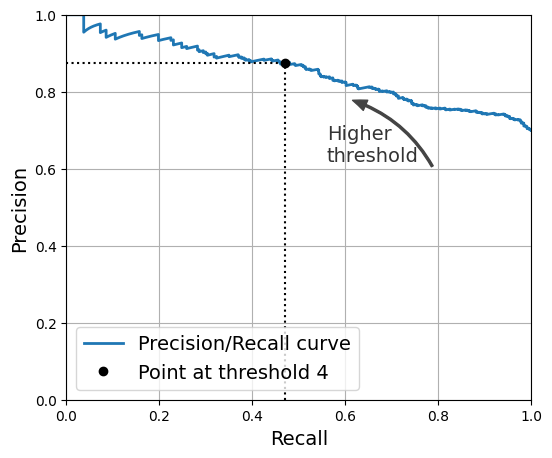

In [116]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

idx = (thresholds >= threshold).argmax()
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 4")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [162]:
y_scores = cross_val_predict(sgd_clf, X_train_50, y_train_good_50, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_good_50, y_scores)

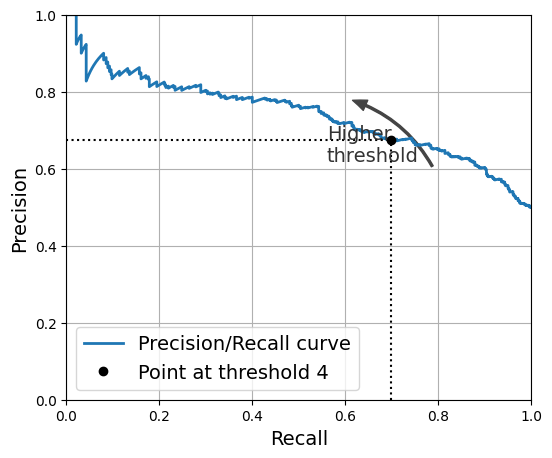

In [119]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

idx = (thresholds >= threshold).argmax()
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 4")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

We'll aim at a high recall in order to guarantee that the model detects most of the "bad credit risk", so we minimize the risks of classifiyng a bad credit as a good credit

In [164]:
idx_for_80_recall = (recalls <= 0.80).argmax()
threshold_for_80_recall = thresholds[idx_for_80_recall]
threshold_for_80_recall

2.076482776362504

In [133]:
y_train_pred_80 = (y_scores >= threshold_for_80_recall)

In [140]:
print(f'recall:', recall_score(y_train_good_50, y_train_pred_80), f'; precision:', precision_score(y_train_good_50, y_train_pred_80))

recall: 0.8 ; precision: 0.6511627906976745


### The ROC Curve

In [159]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_good_50, y_scores)

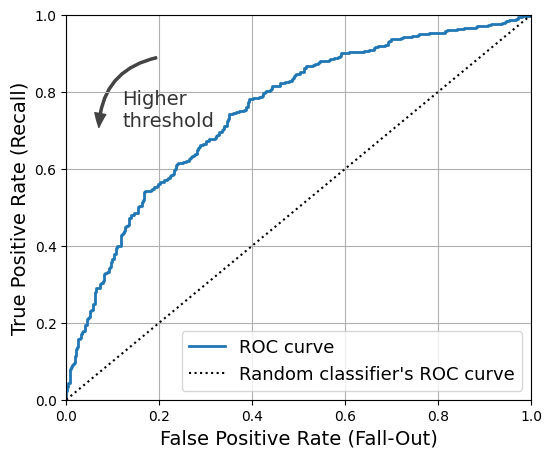

In [168]:
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [169]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_good_50, y_scores)

0.7523054846938775

### Random Forest Classifier

In [170]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))

In [175]:
y_probas_forest = cross_val_predict(forest_clf, X_train_50, y_train_good_50, cv=3,
                                    method="predict_proba")

In [186]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_good_50, y_scores_forest)

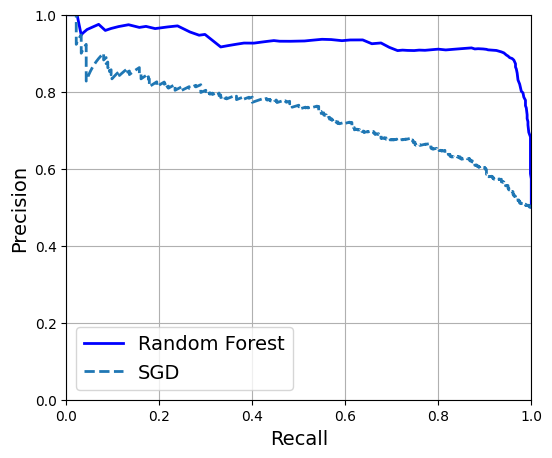

In [187]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [181]:
roc_auc_score(y_train_good_50, y_scores_forest)

0.9501833545918368

In [200]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.3

In [201]:
precision_score(y_train_good_50, y_train_pred_forest)

0.8589540412044374

In [202]:
recall_score(y_train_good_50, y_train_pred_forest)

0.9678571428571429

In [213]:
#forest_clf.fit(X_train_50, y_train_good_50)
rf_model = forest_clf.named_steps['randomforestclassifier']
importances = rf_model.feature_importances_

In [212]:
feature_names_out = preprocessing.get_feature_names_out()

In [217]:
feature_importance = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [218]:
feature_importance

,Feature,Importance
0,annual_amount__ratio,0.092795
1,log__amount,0.089470
2,log__age,0.077080
3,log__duration,0.074263
4,cat__status_... >= 200 DM / salary for at leas...,0.059957
5,cat__status_no checking account,0.044049
6,ord__employment_duration,0.038274
7,ord__installment_rate,0.030029
8,ord__present_residence,0.027023
9,cat__savings_unknown/no savings account,0.020871
